In [44]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 6 00:13:47 2023
@author: AM
"""
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from sklearn.neighbors import NearestNeighbors
import numpy as np


In [45]:
def distancia(p1,p2):
    p1x=p1[0]
    p1y=p1[1]
    p2x=p2[0]
    p2y=p2[1]
    dist=math.sqrt( math.pow(p1x-p2x,2)+math.pow(p1y-p2y,2))
    return dist

In [46]:
dados=pd.read_csv("./assets/dadosAlunos.csv")
X=np.array(dados)

In [47]:
X

array([[2.29992376, 1.46      ],
       [2.14903251, 1.48      ],
       [3.31170849, 1.18      ],
       [2.24414153, 1.4       ],
       [1.03878468, 0.33      ],
       [0.29551605, 0.84      ],
       [2.24898068, 1.42      ],
       [1.08718376, 0.19      ],
       [1.25146566, 0.21      ],
       [4.10026882, 1.59      ],
       [0.2131529 , 0.85      ],
       [3.21328214, 1.15      ],
       [2.18550398, 1.31      ],
       [4.29278835, 1.67      ],
       [2.20680709, 1.48      ],
       [2.14510286, 1.32      ],
       [1.24703631, 0.31      ],
       [1.20115816, 0.28      ],
       [0.26460401, 0.91      ],
       [4.27499683, 1.48      ],
       [2.2884522 , 1.38      ],
       [2.25756227, 1.32      ],
       [3.11213822, 1.07      ],
       [0.1771746 , 0.82      ],
       [1.28103884, 0.26      ],
       [1.03200384, 0.33      ],
       [3.12457904, 1.07      ],
       [0.27950099, 0.78      ],
       [2.29354194, 1.39      ],
       [4.19729917, 1.59      ],
       [4.

In [48]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(X)
distances, indices = nbrs.kneighbors(X)


In [49]:
print("\nVIZINHOS MAIS PROXIMOS")
for i in range(0,len(indices)):
    tp=indices[i]
    print(tp,"\t ",X[tp[0]]," - ",X[tp[1]],"\t ",distances[i][1],"\t",distancia(X[tp[0]],X[tp[1]]))




VIZINHOS MAIS PROXIMOS
[  0 287] 	  [2.29992376 1.46      ]  -  [2.32677319 1.47      ] 	  0.028651211282462407 	 0.028651211282462407
[ 1 44] 	  [2.14903251 1.48      ]  -  [2.1431515 1.48     ] 	  0.005881005417913254 	 0.005881005417913254
[  2 227] 	  [3.31170849 1.18      ]  -  [3.32292204 1.18      ] 	  0.011213549962576952 	 0.011213549962576952
[3 6] 	  [2.24414153 1.4       ]  -  [2.24898068 1.42      ] 	  0.020577106754590735 	 0.020577106754590735
[ 4 25] 	  [1.03878468 0.33      ]  -  [1.03200384 0.33      ] 	  0.0067808404161247005 	 0.0067808404161247005
[ 5 40] 	  [0.29551605 0.84      ]  -  [0.31341229 0.83      ] 	  0.02050062500139728 	 0.02050062500139728
[  6 296] 	  [2.24898068 1.42      ]  -  [2.23986298 1.43      ] 	  0.013532641920833909 	 0.013532641920833909
[ 7 71] 	  [1.08718376 0.19      ]  -  [1.0889054 0.21     ] 	  0.020073964728129924 	 0.020073964728129924
[  8 112] 	  [1.25146566 0.21      ]  -  [1.27717565 0.24      ] 	  0.03950953942927094 	 0.0395

In [50]:
# CALCULO ALTERNATIVO PARA A DISTANCIA II
indices=[]
distances=[]
clusters=[]
fatordistancia = 0.5 # Variar o fator distancia.
fatordistancia = float(fatordistancia)

In [51]:
for i in range(0,len(X)):
    for j in range(0,len(X)):
        dist=distancia(X[i],X[j])
        if (i!=j) and dist<fatordistancia:
            indices.append([i,j])
            distances.append([0,dist])

for i in range(0,len(indices)):
    tp=indices[i]
    print(tp,"\t ",X[tp[0]]," - ",X[tp[1]],"\t ",distances[i][1],"\t",distancia(X[tp[0]],X[tp[1]]))


[0, 1] 	  [2.29992376 1.46      ]  -  [2.14903251 1.48      ] 	  0.1522109365090212 	 0.1522109365090212
[0, 3] 	  [2.29992376 1.46      ]  -  [2.24414153 1.4       ] 	  0.08192470053964425 	 0.08192470053964425
[0, 6] 	  [2.29992376 1.46      ]  -  [2.24898068 1.42      ] 	  0.06477034320375524 	 0.06477034320375524
[0, 12] 	  [2.29992376 1.46      ]  -  [2.18550398 1.31      ] 	  0.18865811852640038 	 0.18865811852640038
[0, 14] 	  [2.29992376 1.46      ]  -  [2.20680709 1.48      ] 	  0.0952402970054908 	 0.0952402970054908
[0, 15] 	  [2.29992376 1.46      ]  -  [2.14510286 1.32      ] 	  0.2087331082122097 	 0.2087331082122097
[0, 20] 	  [2.29992376 1.46      ]  -  [2.2884522 1.38     ] 	  0.08081829474746333 	 0.08081829474746333
[0, 21] 	  [2.29992376 1.46      ]  -  [2.25756227 1.32      ] 	  0.14626857536024365 	 0.14626857536024365
[0, 28] 	  [2.29992376 1.46      ]  -  [2.29354194 1.39      ] 	  0.07029030959383305 	 0.07029030959383305
[0, 37] 	  [2.29992376 1.46      ]  -  


DISTANCIA ENTRE OS VIZINHOS
[[0, 0.1522109365090212], [0, 0.08192470053964425], [0, 0.06477034320375524], [0, 0.18865811852640038], [0, 0.0952402970054908], [0, 0.2087331082122097], [0, 0.08081829474746333], [0, 0.14626857536024365], [0, 0.07029030959383305], [0, 0.2861995249795038], [0, 0.15804284207139144], [0, 0.26702383594098267], [0, 0.29347382879610584], [0, 0.03152764571286344], [0, 0.16173473833629115], [0, 0.16132737900770586], [0, 0.22815243030137142], [0, 0.030429992200763728], [0, 0.16290839020544381], [0, 0.13151191914459967], [0, 0.11184388763994618], [0, 0.17310015811843807], [0, 0.04000831887265685], [0, 0.31287521112670663], [0, 0.21955569479707526], [0, 0.041850817407766874], [0, 0.13092634772108913], [0, 0.031917602496809035], [0, 0.1601714386350818], [0, 0.1922318875842417], [0, 0.2602653265501992], [0, 0.07706258083708879], [0, 0.14269593602733455], [0, 0.14210076724840012], [0, 0.3031243241970581], [0, 0.03168435192872421], [0, 0.167487285937305], [0, 0.282690749

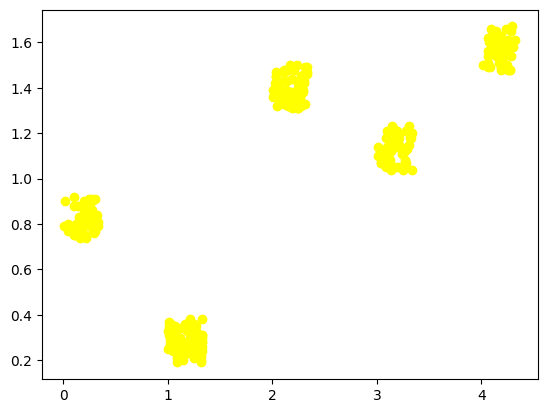

In [52]:
print("\nDISTANCIA ENTRE OS VIZINHOS")
print(distances)
x=[]
y=[]
for i in range(0,len(X)):
    x.append(float(X[i][0]))
    y.append(float(X[i][1]))

plt.scatter(x,y,color="yellow")
plt.show()

In [53]:
matriz=nbrs.kneighbors_graph(X).toarray()
print("\nMATRIZ DE VIZINHOS")
print(matriz)


MATRIZ DE VIZINHOS
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]



MONTAGEM DOS CLUSTERS
0   [0, 1, 3, 6, 12, 14, 15, 20, 21, 28, 37, 44, 45, 54, 65, 76, 77, 79, 81, 82, 86, 87, 90, 91, 92, 95, 110, 113, 116, 118, 119, 120, 129, 134, 136, 137, 138, 146, 147, 157, 162, 163, 166, 167, 168, 175, 177, 190, 194, 195, 197, 200, 206, 210, 212, 223, 224, 232, 235, 242, 250, 257, 258, 265, 269, 270, 271, 273, 277, 280, 287, 293, 296]
1   [2, 11, 22, 26, 35, 42, 47, 51, 60, 63, 69, 70, 96, 98, 99, 100, 106, 123, 125, 126, 140, 148, 152, 159, 160, 170, 174, 178, 182, 183, 187, 189, 192, 202, 204, 205, 211, 216, 220, 221, 225, 227, 228, 238, 239, 243, 251, 252, 253, 255, 256, 261, 263, 284, 290, 295, 297]
2   [4, 7, 8, 16, 17, 24, 25, 31, 36, 52, 53, 55, 56, 59, 61, 67, 71, 72, 73, 74, 75, 80, 83, 93, 97, 103, 104, 109, 112, 114, 121, 122, 131, 139, 144, 150, 155, 169, 171, 172, 173, 181, 184, 185, 191, 193, 196, 203, 208, 209, 213, 215, 219, 222, 230, 231, 233, 234, 236, 249, 276, 278, 281, 282, 283, 286, 288, 291, 292, 294]
3   [5, 10, 18, 23, 27, 32, 33, 40, 

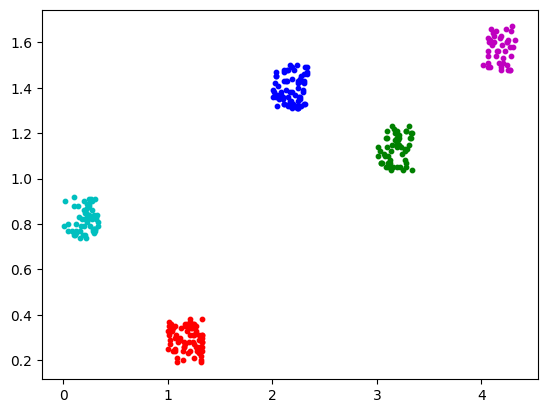

In [54]:
clusters=[]

for i in range(0,len(indices)):
    p0=indices[i][0]
    p1=indices[i][1]
    posP0=-1
    posP1=-1
    chaveP0=False

    for j in range(0,len(clusters)):
        if (p0 in clusters[j]):
            chaveP0=True
            posP0=j
            #clusters.append([p0])
    
    chaveP1=False
    for k in range(0,len(clusters)):
        if (p1 in clusters[k]):
            chaveP1=True
            posP1=k
    
    # VERIFICAR SE p0 e P1 NAO ESTAO CADASTRADOS
    if (chaveP0==False) and (chaveP1==False):
        clusters.append([p0,p1])

    if (chaveP0==True) and (chaveP1==False):
        clusters[posP0]+=[p1]

    if (chaveP0==False) and (chaveP1==True):
        clusters[posP1]+=[p0]
        
    # LISTAR DOS CLUSTERS
print("\nMONTAGEM DOS CLUSTERS")
for i in range(0,len(clusters)):
    print(i," ",clusters[i])
# CORES

ck=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
ck2=["red","green","blue", "yellow","darkblue","darkgreen"]
#PLOTAR PONTOS DOS CLUSTERS
for i in range(0,len(clusters)):
    # MONTAR OS CLASTERS
    xx=[]
    yy=[]
    for j in range(0,len(clusters[i])):
        xx.append(x[clusters[i][j]])
        yy.append(y[clusters[i][j]])
    plt.scatter(xx, yy, s=10, c=ck[i])
plt.show()